#Logestic regression

In [ ]:
#logistic regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('titanic.csv')
data.head()

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   pclass       1309 non-null   int64  
 2   survived     1309 non-null   int64  
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   int64  
 7   parch        1309 non-null   int64  
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


<Axes: xlabel='survived', ylabel='count'>

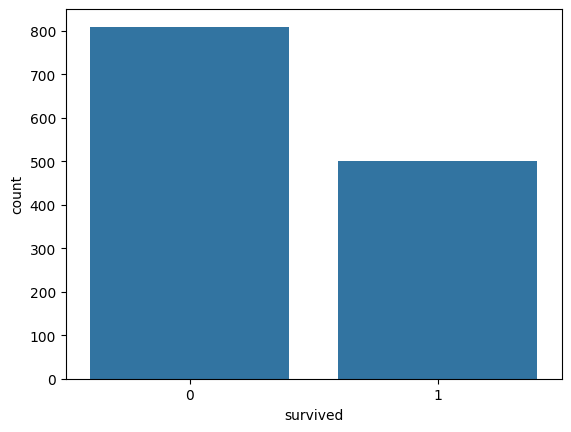

In [ ]:
sns.countplot(x='survived',data=data)

<Axes: xlabel='survived', ylabel='count'>

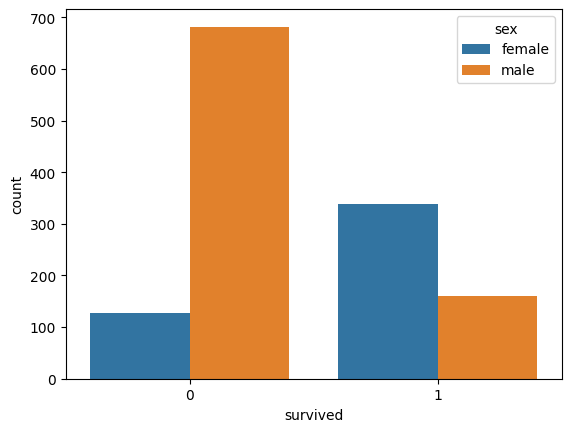

In [ ]:
sns.countplot(x='survived',hue='sex',data=data)

<Axes: xlabel='survived', ylabel='count'>

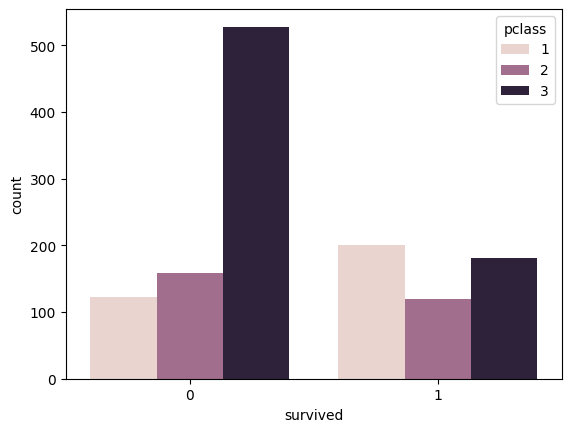

In [ ]:
sns.countplot(x='survived',hue='pclass',data=data)

<Axes: ylabel='Frequency'>

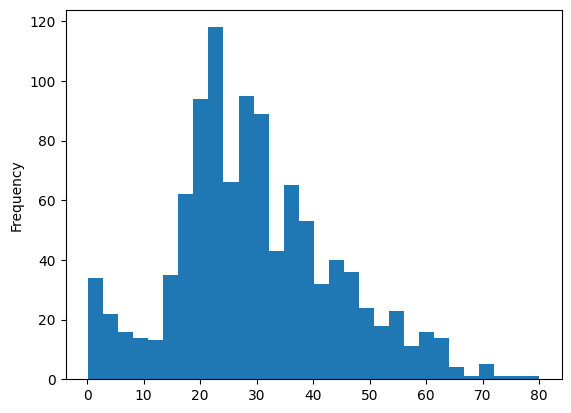

In [ ]:
data['age'].plot.hist(bins=30)

<Axes: ylabel='Frequency'>

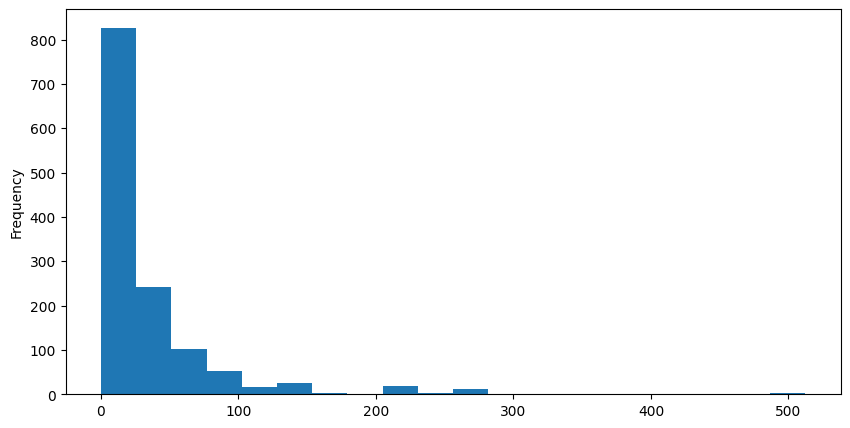

In [ ]:
data["fare"].plot.hist(bins=20, figsize=(10,5))

<Axes: xlabel='sibsp', ylabel='count'>

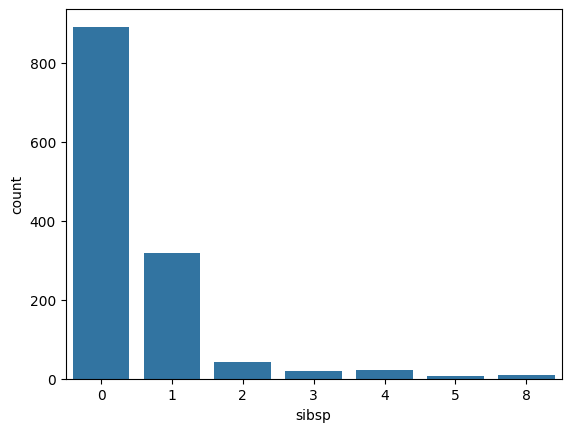

In [ ]:
sns.countplot(x='sibsp',data=data)

In [ ]:
data.isnull()

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,False,True,False
1305,False,False,False,False,False,True,False,False,False,False,True,False
1306,False,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
data.isnull().sum()

,0
passengerid,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1


<Axes: >

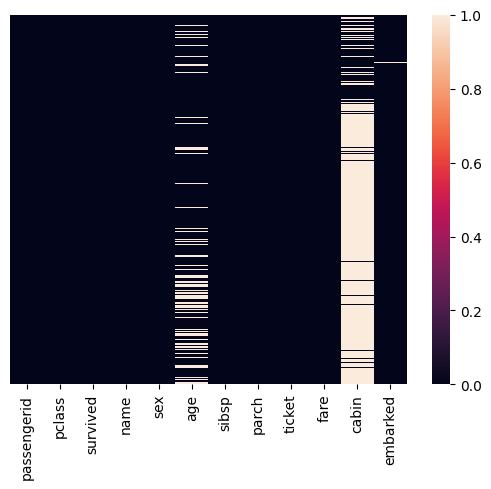

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False)

<Axes: xlabel='pclass', ylabel='age'>

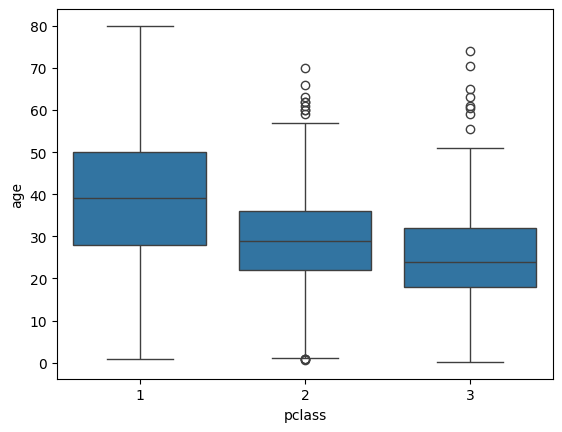

In [ ]:
sns.boxplot(x='pclass',y='age',data=data)

In [ ]:
data.drop('cabin',axis=1,inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

,0
passengerid,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0


In [ ]:
data.head(2)

,passengerid,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S


In [ ]:
male=pd.get_dummies(data['sex'],dtype="i",drop_first=True)

In [ ]:
embark=pd.get_dummies(data['embarked'],dtype="i",drop_first=True)

In [ ]:
pc1=pd.get_dummies(data['pclass'],dtype="i",drop_first=True)

In [ ]:
data=pd.concat([data,male,embark,pc1],axis=1).drop(['sex','embarked','passengerid','pclass','name','ticket'],axis=1)
data.head()

,survived,age,sibsp,parch,fare,male,Q,S,2,3
0,1,29.0000,0,0,211.3375,0,0,1,0,0
1,1,0.9167,1,2,151.5500,1,0,1,0,0
2,0,2.0000,1,2,151.5500,0,0,1,0,0
3,0,30.0000,1,2,151.5500,1,0,1,0,0
4,0,25.0000,1,2,151.5500,0,0,1,0,0


In [ ]:
x=data.drop('survived',axis=1)
y=data['survived']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
prediction=lr.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.79      0.81      0.80       177\n           1       0.74      0.72      0.73       136\n\n    accuracy                           0.77       313\n   macro avg       0.77      0.76      0.77       313\nweighted avg       0.77      0.77      0.77       313\n'

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[143,  34],
       [ 38,  98]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.7699680511182109

In [ ]:

import ipywidgets as widgets
from IPython.display import display

header=widgets.HTML("<h3 style='text-align:center;border-bottom:1px solid grey;'>Survive Or Not</h3>")
footer=widgets.HTML("<p style='text-align:center;'>© 211P011 - Logistic Regression</p>")
age_widget = widgets.IntText(value=30, description='Age:')
fare_widget = widgets.FloatText(value=50, description='Fare:')
male_widget = widgets.Checkbox(value=False, description='Male:')
q_widget = widgets.Checkbox(value=False, description='Embarked Q:')
s_widget = widgets.Checkbox(value=False, description='Embarked S:')
pc2_widget = widgets.Checkbox(value=False, description='Pclass 2:')
pc3_widget = widgets.Checkbox(value=False, description='Pclass 3:')
sibsp_widget = widgets.IntText(value=0, description='SibSp:')
parch_widget = widgets.IntText(value=0, description='Parch:')
prediction_label = widgets.Label(value="")
output = widgets.Output()

predict_button = widgets.Button(description='Predict Survival')

def on_predict_button_clicked(b):
  input_data = {
      'age': age_widget.value,
      'fare': fare_widget.value,
      'male': int(male_widget.value),
      'Q': int(q_widget.value),
      'S': int(s_widget.value),
      '2': int(pc2_widget.value),
      '3': int(pc3_widget.value),
      'sibsp': sibsp_widget.value,
      'parch': parch_widget.value,
  }
  input_df = pd.DataFrame([input_data],columns=lr.feature_names_in_)
  prediction = lr.predict(input_df)

  if prediction[0] == 1:
    prediction_label.value = "Passenger is predicted to survive."
  else:
    prediction_label.value = "Passenger is predicted to not survive."

predict_button.on_click(on_predict_button_clicked)

top_row = widgets.HBox([widgets.VBox([age_widget, fare_widget, male_widget, q_widget, s_widget, pc2_widget, pc3_widget, sibsp_widget, parch_widget, predict_button, prediction_label]), output],
                       layout=widgets.Layout(align_items='center', justify_content='center'))
main_layout = widgets.VBox([header, top_row, footer],
                            layout=widgets.Layout(align_items='center', justify_content='center'))
display(main_layout)
